# Base de dados (Kaggle)

<https://www.kaggle.com/c/dogs-vs-cats/>

# Carregando as imagens

In [1]:
import os
current_dir = os.path.abspath(os.getcwd())

# Converter base de dados para treino, validação e teste

In [2]:
folder = '\\cats_and_dogs_dataset'
train_folder = current_dir + folder + '\\train'
val_folder = current_dir + folder + '\\validation'
test_folder = current_dir + folder + '\\test'

# Carregamento de imagens no RNA por meio do Tensorflow

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(train_folder, image_size=(180,180), batch_size=32)
validation_dataset = image_dataset_from_directory(val_folder, image_size=(180,180), batch_size=32)
test_dataset = image_dataset_from_directory(test_folder, image_size=(180,180), batch_size=32)

Found 17475 files belonging to 2 classes.
Found 2556 files belonging to 2 classes.
Found 4969 files belonging to 2 classes.


# Data Augmentation

In [4]:
from matplotlib import pyplot as plt

def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 20, 'fontweight': 'medium'})
    plt.show()
    
def showMultipleImages(imgsArray, titlesArray, size, x, y):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1 and y == 1):
        showSingleImage(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, 'gray')
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, 'gray')
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 18, 'fontweight': 'medium'}, pad = 10)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, 'gray')
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show()

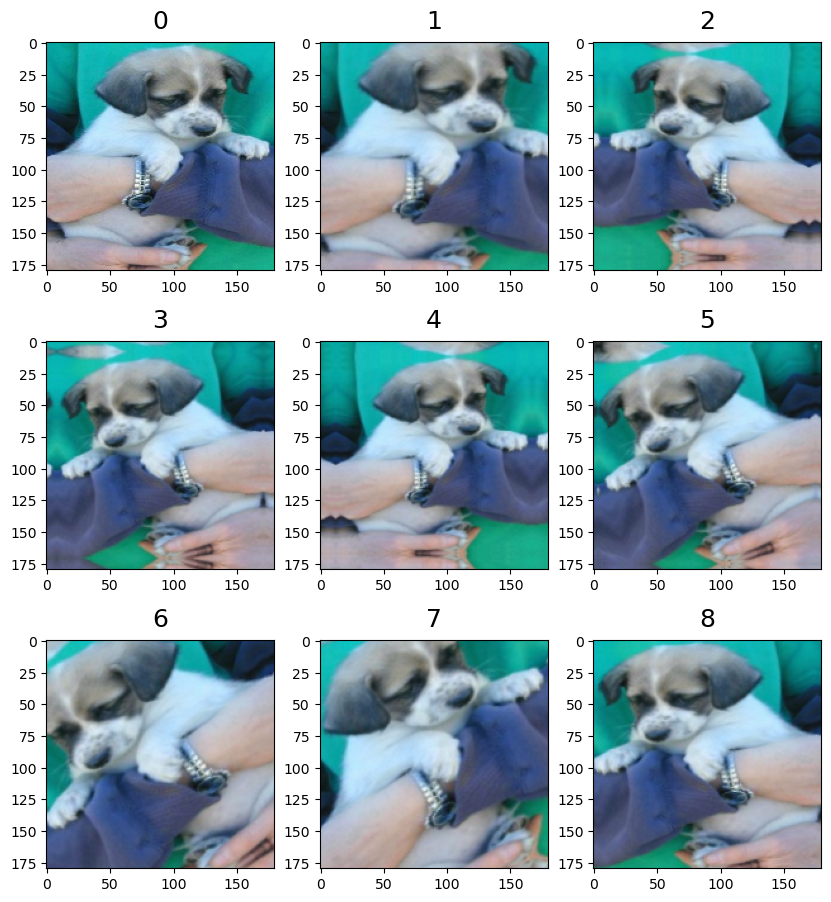

In [5]:
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

dt_model = keras.Sequential(
    [
    Rescaling(scale=1.0/255),
    RandomFlip('horizontal'),
    RandomRotation(0.1),
    RandomZoom(0.2)
    ]
)

images_list = []
for images, labels in train_dataset.take(1):
    first_image = images[0].numpy().astype('uint8')
    images_list.append(first_image)
    for i in range(8):
        augmented_image = dt_model(images[0])
        images_list.append(augmented_image)

titles = [str(i) for i in range(9)]
showMultipleImages(images_list, titles, (10, 11), 3, 3)

# Treinando o modelo

In [6]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = keras.Sequential(
    [
    Rescaling(scale=1.0/255),
    RandomFlip('horizontal'),
    RandomRotation(0.1),
    RandomZoom(0.2)
    ]
)

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [ModelCheckpoint(filepath='model_reg.keras', save_best_only=True, monitor='val_loss')]

history = model.fit(train_dataset, epochs=40, validation_data = validation_dataset, callbacks=callbacks)

Epoch 1/40
547/547 [==============================] - 731s 1s/step - loss: 0.8648 - accuracy: 0.6350 - val_loss: 0.5999 - val_accuracy: 0.6663
Epoch 2/40
547/547 [==============================] - 698s 1s/step - loss: 0.5705 - accuracy: 0.7093 - val_loss: 0.5681 - val_accuracy: 0.7074
Epoch 3/40
547/547 [==============================] - 694s 1s/step - loss: 0.5146 - accuracy: 0.7547 - val_loss: 0.4091 - val_accuracy: 0.8028
Epoch 4/40
547/547 [==============================] - 694s 1s/step - loss: 0.4598 - accuracy: 0.7920 - val_loss: 0.4752 - val_accuracy: 0.7567
Epoch 5/40
547/547 [==============================] - 725s 1s/step - loss: 0.4053 - accuracy: 0.8225 - val_loss: 0.4889 - val_accuracy: 0.7680
Epoch 6/40
547/547 [==============================] - 741s 1s/step - loss: 0.3627 - accuracy: 0.8438 - val_loss: 0.3610 - val_accuracy: 0.8435
Epoch 7/40
547/547 [==============================] - 699s 1s/step - loss: 0.3366 - accuracy: 0.8585 - val_loss: 0.4285 - val_accuracy: 0.8243

# Resultados

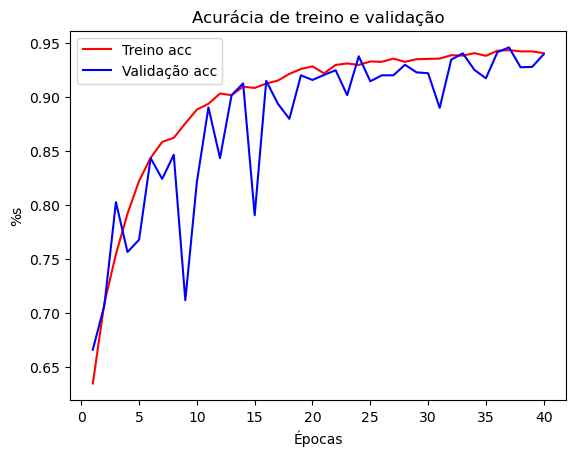

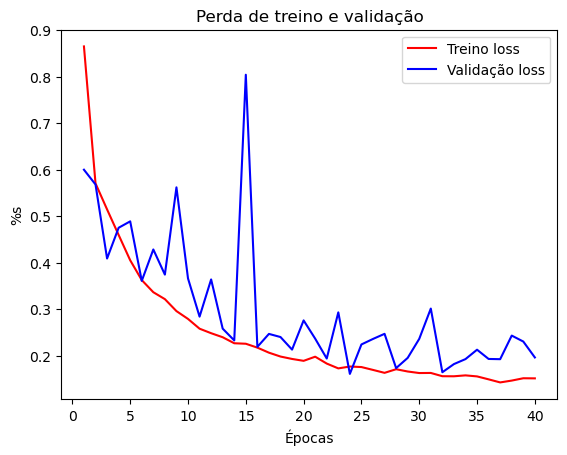

<Figure size 640x480 with 0 Axes>

In [8]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'r', label='Treino acc')
plt.plot(epochs, val_accuracy, 'b', label='Validação acc')
plt.xlabel('Épocas')
plt.ylabel('%s')
plt.title('Acurácia de treino e validação')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Treino loss')
plt.plot(epochs, val_loss, 'b', label='Validação loss')
plt.xlabel('Épocas')
plt.ylabel('%s')
plt.title('Perda de treino e validação')
plt.legend()
plt.figure()
plt.show()

# Resultado conjunto de teste

In [9]:
from tensorflow import keras
model = keras.models.load_model('model_reg.keras')

In [10]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

156/156 [==============================] - 39s 248ms/step - loss: 0.1675 - accuracy: 0.9336
Test accuracy: 0.934


# Testando o modelo

In [11]:
from matplotlib import pyplot as plt

def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)
    
    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize':20, 'fontweight':'medium'})
    plt.show()

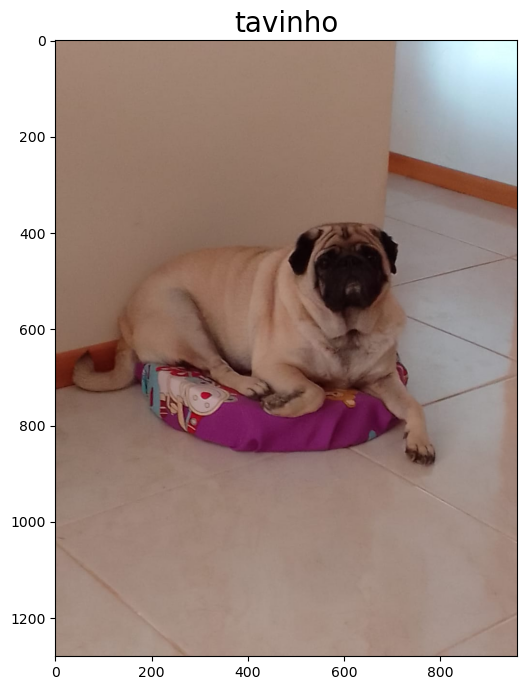

In [21]:
import cv2
img_name = 'Tavinho.jpeg'
tavinho_img = cv2.imread(img_name)
tavinho_img = cv2.cvtColor(tavinho_img, cv2.COLOR_BGR2RGB)

showSingleImage(tavinho_img, 'tavinho', (12, 8))

In [27]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

tavinho_img = load_img(img_name, target_size=(180, 180))
x = img_to_array(tavinho_img)
x = np.expand_dims(x, axis=0)
pred=(model.predict(x) > 0.5).astype('int32')[0][0]

if pred == 1:
    print('Cachorro')
else:
    print('Gato')
    
print(model.predict(x))

1/1 [==============================] - 0s 196ms/step
Cachorro
1/1 [==============================] - 0s 37ms/step
[[0.90361524]]


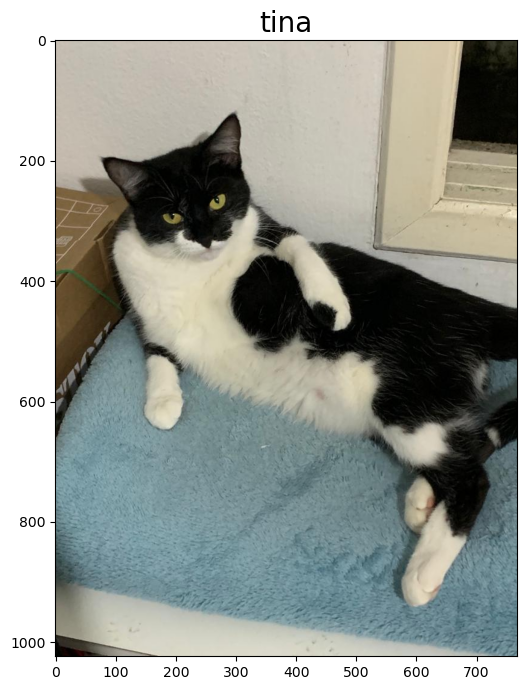

In [28]:
img_name = 'Tina.jpeg'
tina_img = cv2.imread(img_name)
tina_img = cv2.cvtColor(tina_img, cv2.COLOR_BGR2RGB)

showSingleImage(tina_img, 'tina', (12, 8))

In [29]:
tina_img = load_img(img_name, target_size=(180, 180))
x = img_to_array(tina_img)
x = np.expand_dims(x, axis=0)
pred=(model.predict(x) > 0.5).astype('int32')[0][0]

if pred == 1:
    print('Cachorro')
else:
    print('Gato')
    
print(model.predict(x))

1/1 [==============================] - 0s 29ms/step
Gato
1/1 [==============================] - 0s 36ms/step
[[7.326446e-06]]
